In [1]:
%%capture

# download data
!wget https://figshare.com/ndownloader/files/30853717 -O data.zip
!unzip data.zip && mkdir -p data/ && mv single_cell_data/zeisel_2015/* data/ && rm data.zip && rm -r single_cell_data

In [2]:
import scdrs

from scipy import stats
import pandas as pd
import scanpy as sc
from anndata import AnnData

sc.set_figure_params(dpi=125)

import numpy as np
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings


In [20]:
adata.obs_names

Index(['1772071015_C02', '1772071017_G12', '1772071017_A05', '1772071014_B06',
       '1772067065_H06', '1772071017_E02', '1772067065_B07', '1772067060_B09',
       '1772071014_E04', '1772071015_D04',
       ...
       '1772066110_D12', '1772071017_A07', '1772063071_G10', '1772058148_C03',
       '1772063061_D09', '1772067059_B04', '1772066097_D04', '1772063068_D01',
       '1772066098_A12', '1772058148_F03'],
      dtype='object', name='cell_id', length=3005)

In [7]:
# load adata
adata = sc.read_h5ad("data/expr.h5ad")

# subset gene sets
df_gs = pd.read_csv("data/geneset.gs", sep="\t", index_col=0)

df_gs = df_gs.loc[
    [
        "PASS_Schizophrenia_Pardinas2018",
        "spatial_dorsal",
        "UKB_460K.body_HEIGHTz",
    ],
    :,
].rename(
    {
        "PASS_Schizophrenia_Pardinas2018": "SCZ",
        "spatial_dorsal": "Dorsal",
        "UKB_460K.body_HEIGHTz": "Height",
    }
)
display(df_gs)

df_gs.to_csv("data/geneset.gs", sep="\t")

KeyError: "None of [Index(['PASS_Schizophrenia_Pardinas2018', 'spatial_dorsal',\n       'UKB_460K.body_HEIGHTz'],\n      dtype='object', name='TRAIT')] are in the [index]"

In [18]:
adata.var_names

Index(['Tspan12', 'Tshz1', 'Fnbp1l', 'Adamts15', 'Cldn12', 'Rxfp1',
       '2310042E22Rik', 'Sema3c', 'Jam2', 'Apbb1ip',
       ...
       'Rab9', 'Tceanc', 'Msl3', 'Arhgap6', 'Mid1', 'Vamp7', 'Tmlhe', 'Zf12',
       'Kdm5d', 'Uty'],
      dtype='object', name='gene', length=14538)

In [5]:
%%capture

!python ~/bin/scDRS/compute_score.py \
    --h5ad_file data/expr.h5ad \
    --h5ad_species mouse \
    --gs_file data/geneset.gs \
    --gs_species mouse \
    --cov_file data/cov.tsv \
    --flag_filter True \
    --flag_raw_count True \
    --flag_return_ctrl_raw_score False \
    --flag_return_ctrl_norm_score True \
    --out_folder data/

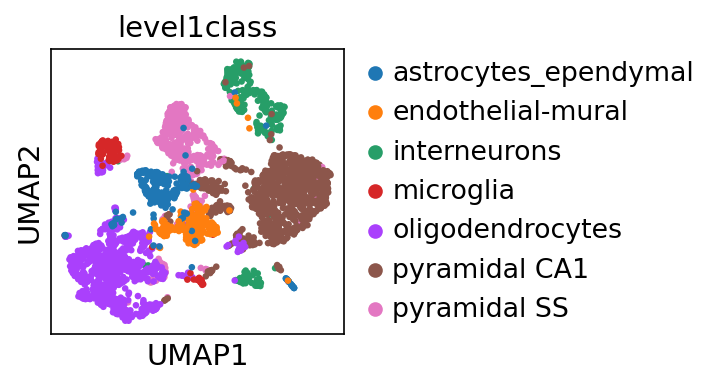

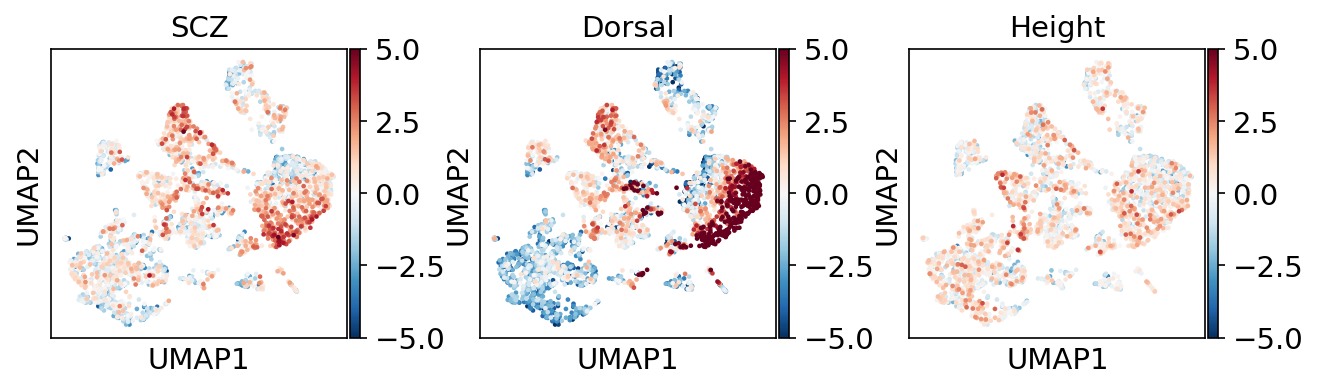

In [6]:
dict_score = {
    trait: pd.read_csv(f"data/{trait}.full_score.gz", sep="\t", index_col=0)
    for trait in df_gs.index
}

for trait in dict_score:
    adata.obs[trait] = dict_score[trait]["norm_score"]

sc.set_figure_params(figsize=[2.5, 2.5], dpi=150)
sc.pl.umap(
    adata,
    color="level1class",
    ncols=1,
    color_map="RdBu_r",
    vmin=-5,
    vmax=5,
)

sc.pl.umap(
    adata,
    color=dict_score.keys(),
    color_map="RdBu_r",
    vmin=-5,
    vmax=5,
    s=20,
)